## Question 1

 For the question in last week's lab, is the search direction a gradient descent one? Comment on that.

## Question 2

Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (x1^2+x2−11)^2+(x1+x2^2−7)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.



## Solution

Local minimum (Starting Point 1): [-3.77931026 -3.28318599]
Value of J at local minimum: 2.036318668431359e-15


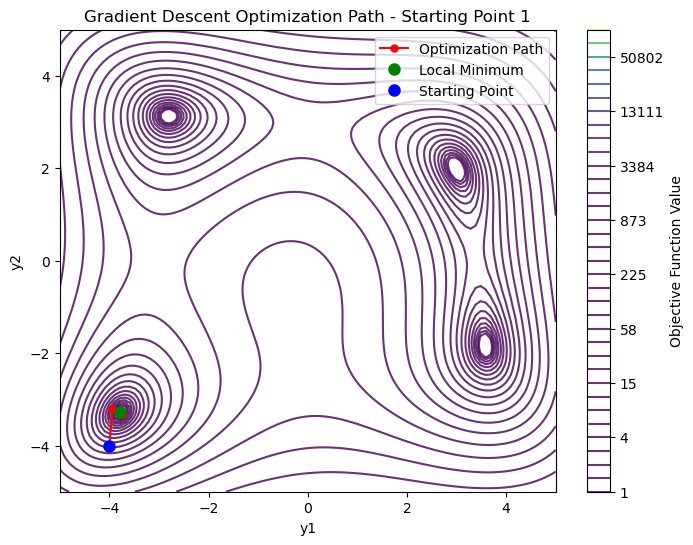

Local minimum (Starting Point 2): [-2.8051181   3.13131252]
Value of J at local minimum: 2.5108444424853406e-15


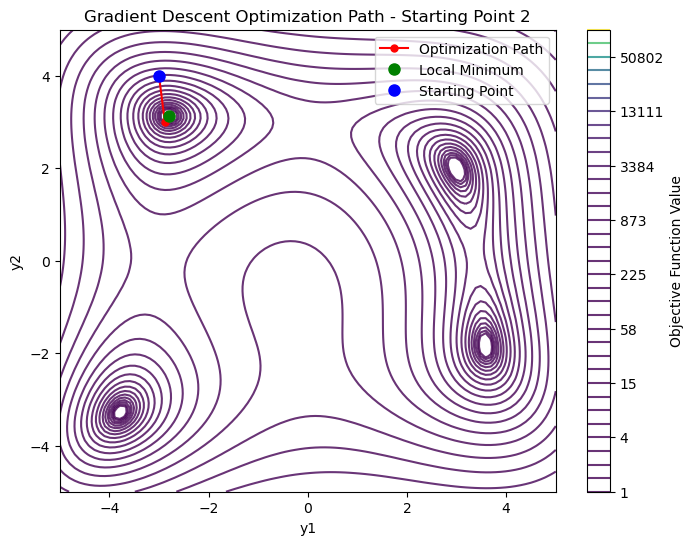

Local minimum (Starting Point 3): [ 3.58442834 -1.84812655]
Value of J at local minimum: 1.1240471126475556e-14


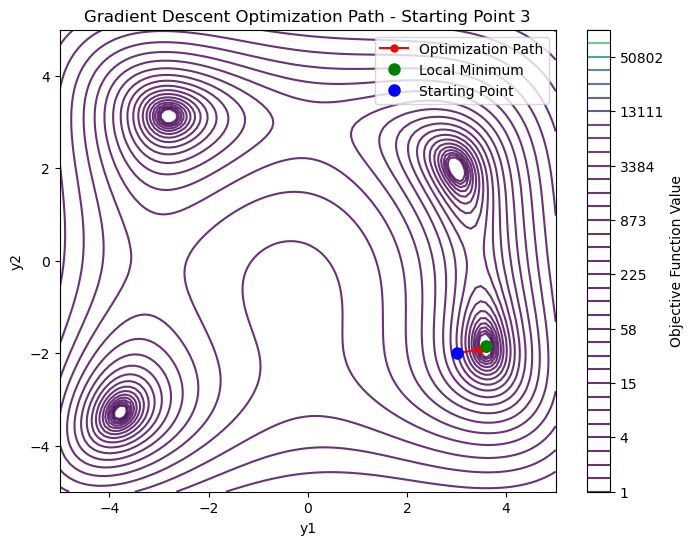

Local minimum (Starting Point 4): [2.99999999 2.00000003]
Value of J at local minimum: 1.5543296300987647e-14


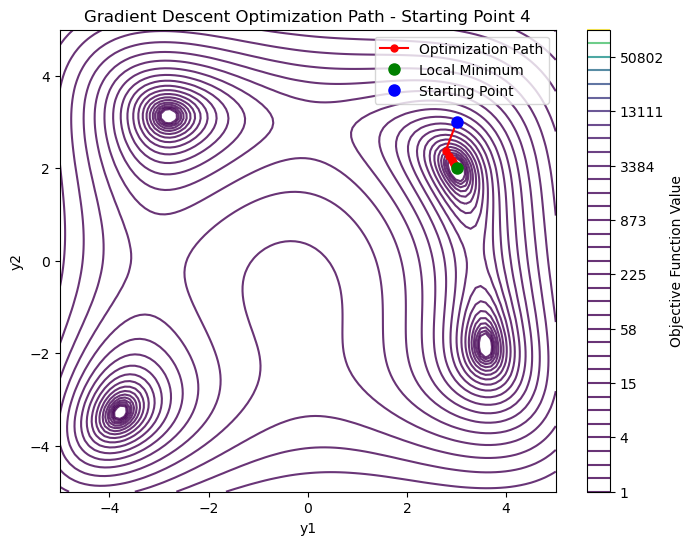

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function J(y1, y2)
def objective_function(y1, y2):
    return (y1**2 + y2 - 11)**2 + (y1 + y2**2 - 7)**2

# Define the gradient of J(y1, y2)
def gradient_function(y1, y2):
    df_dy1 = 4 * y1 * (y1**2 + y2 - 11) + 2 *(y1 + y2**2 - 7)
    df_dy2 = 2 * (y1**2 + y2 - 11) + 4 * y2 * (y1 + y2**2 - 7)
    return np.array([df_dy1, df_dy2])

# Perform gradient descent
def gradient_descent(starting_point, alpha=0.01, max_iterations=1000, tolerance=1e-8):
    y = starting_point
    for _ in range(max_iterations):
        grad = gradient_function(*y)
        y_new = y - alpha * grad
        if np.linalg.norm(y_new - y) < tolerance:
            break
        y = y_new
    return y

# Set starting points for gradient descent
starting_points = [
    np.array([-4.0, -4.0]),
    np.array([-3.0, 4.0]),
    np.array([3.0, -2.0]),
    np.array([3.0, 3.0])
]

# Perform gradient descent for each starting point and plot the optimization path
for i, starting_point in enumerate(starting_points):
    minima = gradient_descent(starting_point)
    print(f"Local minimum (Starting Point {i+1}):", minima)
    print("Value of J at local minimum:", objective_function(*minima))

    # Plot the optimization path
    path = [starting_point]
    y = starting_point
    for _ in range(1000):
        grad = gradient_function(*y)
        y_new = y - 0.01 * grad
        path.append(y_new)
        if np.linalg.norm(y_new - y) < 1e-8:
            break
        y = y_new
    path = np.array(path)
        
    y1 = np.linspace(-5, 5, 100)
    y2 = np.linspace(-5, 5, 100)
    Y1, Y2 = np.meshgrid(y1, y2)
    Z = objective_function(Y1, Y2)

    plt.figure(figsize=(8, 6))
    plt.contour(Y1, Y2, Z, levels=np.logspace(0, 5, 35), cmap='viridis', alpha=0.8)
    plt.colorbar(label='Objective Function Value')
    plt.plot(path[:, 0], path[:, 1], '-o', color='r', markersize=5, label='Optimization Path')
    plt.plot(minima[0], minima[1], 'go', markersize=8, label='Local Minimum')
    plt.plot(starting_point[0], starting_point[1], 'bo', markersize=8, label='Starting Point')
    plt.title(f'Gradient Descent Optimization Path - Starting Point {i+1}')
    plt.xlabel('y1')
    plt.ylabel('y2')
    plt.legend()
    plt.show()


The optimal point is [-2.80511751  3.13131213]
The iteration points are
[[-1.          0.        ]
 [-3.32016602  1.93347168]
 [-2.48721956  2.93311409]
 [-2.7671904   3.16667331]
 [-2.79981093  3.12770933]
 [-2.80466292  3.13175199]
 [-2.80506272  3.13127492]
 [-2.80511338  3.13131708]
 [-2.80511751  3.13131213]]


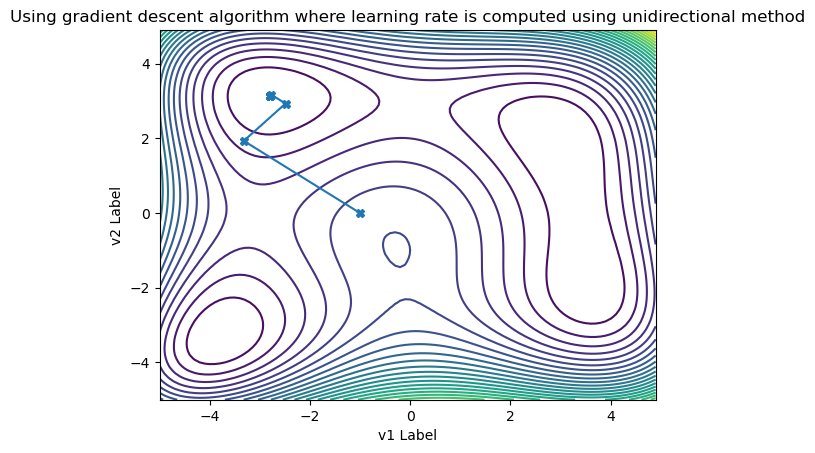

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def grad_F(v):   # calculating gradient of the function at a point.
    length = np.size(v)
    grad = np.zeros(length)
    
    grad[0] = (4*(v[0]**3)) - (42* v[0]) + (4*v[0]*v[1]) + (2 * (v[1]**2)) - 14
    grad[1] = (2*(v[0]**2)) + (4*v[0]*v[1]) - (26 * v[1]) + (4 * (v[1]**3)) - 22
    
    return grad

def phi(v):
    val = ((v[0]**2) + v[1] - 11)**2 + (v[0] + (v[1]**2) - 7)**2
    return val


def bracketing_method_beta(v_initial, direction, a, b, n):
    d_beta = (b - a)/n
    v1 = a
    v2 = v1 + d_beta
    v3 = v2 + d_beta
    while(v3 <= b):
        x = v_initial + v1*direction
        y = v_initial + v2*direction
        z = v_initial + v3*direction
        if((phi(x) >= phi(y)) and (phi(y) <= phi(z))):
            return v1, v3
        else:
            v1 = v2
            v2 = v3
            v3 = v3 + d_beta
    if(phi(v_initial + a*direction) > phi(v_initial + b*direction)):
        return (b - d_beta), b
    else:
        return a, (a + d_beta)

def Region_elimination_beta(v_initial, direction, a, b):
    L = b - a
    eps = 1e-5
    v_m = (a+b)/2
    while(L > eps):
        v_1 = a + L/4
        v_2 = b - L/4
        x = v_initial + v_1*direction
        y = v_initial + v_m*direction
        z = v_initial + v_2*direction
        if(phi(x) < phi(y)):
            b = v_m
            v_m = v_1
        elif(phi(z) < phi(y)):
            a = v_m
            v_m = v_2
        else:
            a = v_1
            b = v_2   
        L = b - a
    return a
        

def Unidirectional(v_initial , direction, n):
    beta_1 = 0
    beta_2 = 5
    interval = bracketing_method_beta(v_initial, direction, beta_1, beta_2, n)
    
    pt = Region_elimination_beta(v_initial, direction, interval[0], interval[1])
    return pt
    
def Gradient_descent(start_point):    # Using unidirectional method to find learning rate.
    v = start_point
    grad = grad_F(v)
    eps = 10e-5
    iterates = []
    iterates.append(list(v))
    
    while(pow(np.dot(grad, grad), 0.5) > eps):
        direction = - grad
        beta = Unidirectional(v, direction, 50)
        v = v - beta*grad
        iterates.append(list(v))
        grad = grad_F(v)
        
    iterates = np.array(iterates)    
    return v, iterates



initial_point = np.array([-1, 0])
optimal_point , iteration_points = Gradient_descent(initial_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are')
print(iteration_points)


v1 = np.arange(-5, 5, 0.1)
v2 = np.arange(-5, 5, 0.1)
V1, V2 = np.meshgrid(v1, v2)  #Forming MeshGrid

J = ((V1**2) + V2 - 11)**2 + (V1 + (V2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(V1, V2, J, 30)
ax.plot(iteration_points[:, 0], iteration_points[:, 1], "X-")
ax.set_xlabel('v1 Label')
ax.set_ylabel('v2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()


The optimal point is [ 3.5844283  -1.84812653]
The iteration points are
[[-4.          3.        ]
 [ 2.36716309  3.38588867]
 [ 2.43681544  2.23912388]
 [ 2.9158417   2.26811694]
 [ 3.16646146 -1.83625765]
 [ 3.58118397 -1.81094623]
 [ 3.58401778 -1.84813842]
 [ 3.58442667 -1.84810806]
 [ 3.5844283  -1.84812653]]


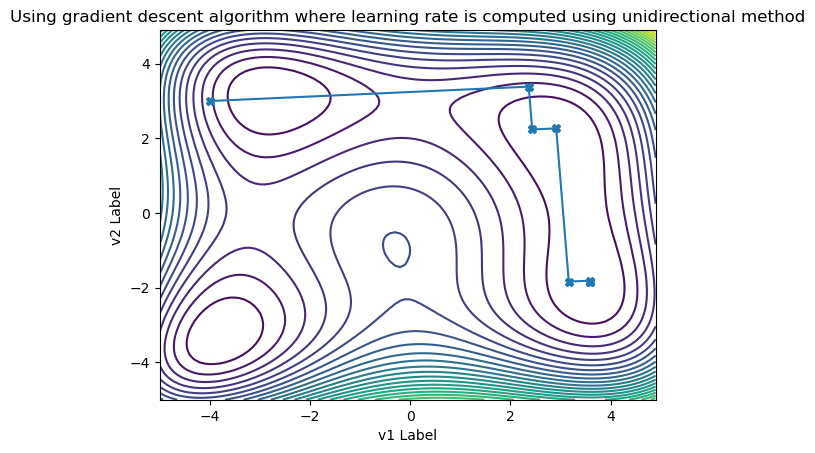

In [4]:
initial_point = np.array([-4, 3])
optimal_point , iteration_points = Gradient_descent(initial_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are')
print(iteration_points)


v1 = np.arange(-5, 5, 0.1)
v2 = np.arange(-5, 5, 0.1)
V1, V2 = np.meshgrid(v1, v2)  #Forming MeshGrid

J = ((V1**2) + V2 - 11)**2 + (V1 + (V2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(V1, V2, J, 30)
ax.plot(iteration_points[:, 0], iteration_points[:, 1], "X-")
ax.set_xlabel('v1 Label')
ax.set_ylabel('v2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()


The optimal point is [-2.80511794  3.13131249]
The iteration points are
[[-3.          2.        ]
 [-2.72160645  3.11357422]
 [-2.80421901  3.13434426]
 [-2.80499594  3.13128641]
 [-2.80511702  3.13131616]
 [-2.80511794  3.13131249]]


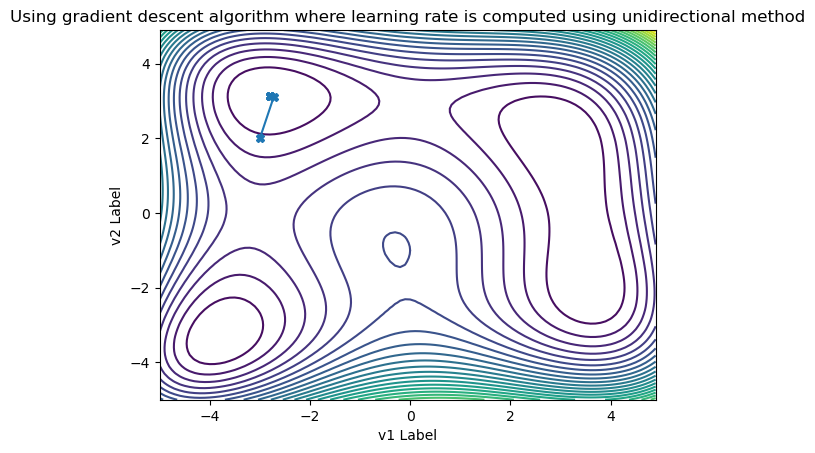

In [5]:
initial_point = np.array([-3, 2])
optimal_point , iteration_points = Gradient_descent(initial_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are')
print(iteration_points)


v1 = np.arange(-5, 5, 0.1)
v2 = np.arange(-5, 5, 0.1)
V1, V2 = np.meshgrid(v1, v2)  #Forming MeshGrid

J = ((V1**2) + V2 - 11)**2 + (V1 + (V2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(V1, V2, J, 30)
ax.plot(iteration_points[:, 0], iteration_points[:, 1], "X-")
ax.set_xlabel('v1 Label')
ax.set_ylabel('v2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()


The optimal point is [-3.77931033 -3.28318593]
The iteration points are
[[ 4.          4.        ]
 [ 2.73776245  2.32196655]
 [ 3.01442336  2.11179338]
 [-0.75868536 -2.85766268]
 [-2.92914858 -1.20972453]
 [-4.11216346 -2.76743369]
 [-3.66189194 -3.10949342]
 [-3.78747143 -3.27581028]
 [-3.77877423 -3.28239921]
 [-3.77933779 -3.28316203]
 [-3.77930871 -3.28318371]
 [-3.77931033 -3.28318593]]


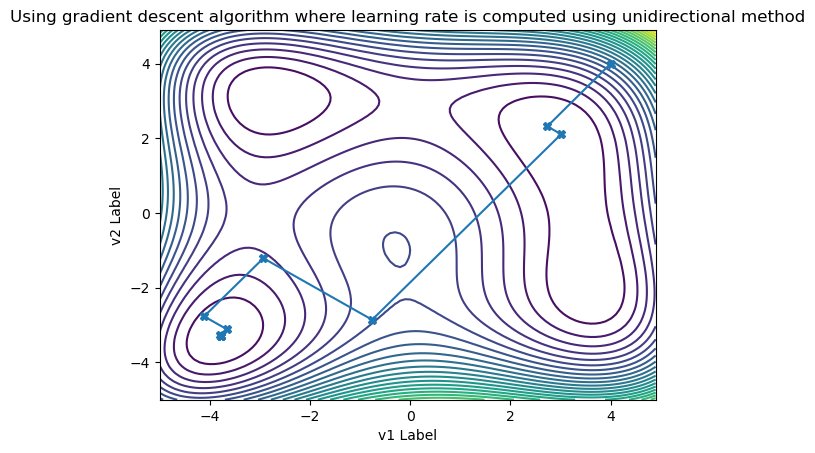

In [6]:
initial_point = np.array([4, 4])
optimal_point , iteration_points = Gradient_descent(initial_point)
print(f'The optimal point is {optimal_point}')
print('The iteration points are')
print(iteration_points)


v1 = np.arange(-5, 5, 0.1)
v2 = np.arange(-5, 5, 0.1)
V1, V2 = np.meshgrid(v1, v2)  #Forming MeshGrid

J = ((V1**2) + V2 - 11)**2 + (V1 + (V2**2) - 7)**2

fig, ax = plt.subplots(1, 1) 
ax.contour(V1, V2, J, 30)
ax.plot(iteration_points[:, 0], iteration_points[:, 1], "X-")
ax.set_xlabel('v1 Label')
ax.set_ylabel('v2 Label')
ax.set_title('Using gradient descent algorithm where learning rate is computed using unidirectional method')
plt.show()
